# Evaluating Consolidated Galactic Plane Survey Footprints

In [1]:
from os import path
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord, Galactic
from astropy import units as u
from astropy.io import fits

The procedure for generating the sky maps is as follows, using code from https://github.com/LSST-TVSSC/software_tools.
1. Footprint maps for each of the individual science cases are generated using generate_sky_maps.py.  The file footprint_maps/footprint_map_config.json provides the configuration for all of these programs. 
2. The combined footprint map including all science cases is generated using the generate_priority_map.py.  This produces a data table of the priority per HEALpixel in FITS table format. 
3. The combined footprint map HEALpixel data table is converted to a Mollweide map projection in FITS image format, using the code project_galmap_mollweide.py. 
4. The program objdetect_galplane_map.py, uses an object detection routine to detect centers of high priority, and then apply a clustering algorithm to condense the footprint as much as possible. 

Object_galplane_map now accepts a range of priority threshold values to calculate for, and generates the datafile survey_area_priority_data.dat.  Here we explore those data:

In [27]:
data_file = '/Users/rstreet1/software/LSST-TVS_software_tools/GalPlaneSurvey/HighCadenceZone/survey_area_priority_data.dat'
data = np.loadtxt(data_file)
print(data)

[[2.00000000e+00 3.41844302e+03 5.17605071e+03]
 [2.02000000e+00 3.15238693e+03 4.87826154e+03]
 [2.04000000e+00 2.79736572e+03 4.50650794e+03]
 [2.06000000e+00 2.84520546e+03 4.53089110e+03]
 [2.08000000e+00 2.93249200e+03 4.57142308e+03]
 [2.10000000e+00 2.80072289e+03 4.46201893e+03]
 [2.12000000e+00 2.78813349e+03 4.44793329e+03]
 [2.14000000e+00 2.82002665e+03 4.47348463e+03]
 [2.16000000e+00 2.49186283e+03 4.13625278e+03]
 [2.18000000e+00 2.66391803e+03 4.28786823e+03]
 [2.20000000e+00 2.63286417e+03 4.22893484e+03]
 [2.22000000e+00 2.55984562e+03 4.15083635e+03]
 [2.24000000e+00 2.60264959e+03 4.16855418e+03]
 [2.26000000e+00 2.49270213e+03 4.03370370e+03]
 [2.28000000e+00 2.31561117e+03 3.79890949e+03]
 [2.30000000e+00 2.34582574e+03 3.81876700e+03]
 [2.32000000e+00 2.31980764e+03 3.77921253e+03]
 [2.34000000e+00 2.15530608e+03 3.57479124e+03]
 [2.36000000e+00 2.15782396e+03 3.57763008e+03]
 [2.38000000e+00 2.17041337e+03 3.60163169e+03]
 [2.40000000e+00 1.99919746e+03 3.388852

Text(0.5, 0, 'Priority threshold')

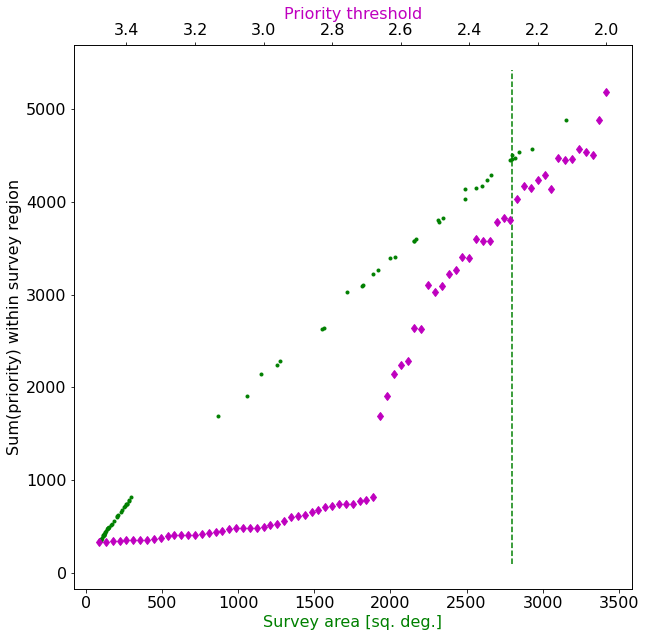

In [29]:
# This is the nominal survey area within the Galactic Plane assigned in the baseline_v2.0 opsim.  
# See notebook Rubin_baseline_footprint.
# The two different survey areas are produced by considering the Galactic Plane to be defined as 
# |b| <= 10.0 and |b| <= 15.0deg
baseline2_galplane_area = 1483.87
baseline2_galplane_area = 2797.37

(fig, ax1) = plt.subplots(1, 1, figsize=(10, 10))
ax1.plot(data[:,1], data[:,2],'g.')
#ax1.plot(data[:,1], data[:,2],'g-')
(xmin,xmax,ymin,ymax) = plt.axis()
ax1.plot([baseline2_galplane_area]*2, [ymin,ymax], 'g--')
ax1.set_xlabel('Survey area [sq. deg.]', fontsize=16, color='g')
ax1.set_ylabel('Sum(priority) within survey region', fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2 = ax1.twiny()
ax2.plot(data[:,0], data[:,2], 'md')
#ax2.plot(data[:,0], data[:,2], 'm-')
ax2.invert_xaxis()
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Priority threshold', fontsize=16, color='m')